In [24]:
import tensorflow as tf
import numpy as np
import csv
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [3]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [4]:
# Load data
data=[] # list of lists of the from [similes, sequence, pKd]

with open('dataset.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) #skip header
    for row in reader:
        triplet=[]
        triplet.append(row[0])
        triplet.append(row[1])
        triplet.append(float(row[2]))
        data.append(triplet)

len(data)
        

9125

In [5]:
data[0]  #looks good!

['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSE

In [6]:
smiles=[]
proteins=[]
labels=[]
random.shuffle(data)

for triplet in range(len(data)):
      smiles.append(data[triplet][0])
      proteins.append(data[triplet][1])
      labels.append(data[triplet][2])

In [7]:
print(smiles[0])
print(proteins[0])
print(labels[0])

CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl
MPLRHWGMARGSKPVGDGAQPMAAMGGLKVLLHWAGPGGGEPWVTFSESSLTAEEVCIHIAHKVGITPPCFNLFALFDAQAQVWLPPNHILEIPRDASLMLYFRIRFYFRNWHGMNPREPAVYRCGPPGTEASSDQTAQGMQLLDPASFEYLFEQGKHEFVNDVASLWELSTEEEIHHFKNESLGMAFLHLCHLALRHGIPLEEVAKKTSFKDCIPRSFRRHIRQHSALTRLRLRNVFRRFLRDFQPGRLSQQMVMVKYLATLERLAPRFGTERVPVCHLRLLAQAEGEPCYIRDSGVAPTDPGPESAAGPPTHEVLVTGTGGIQWWPVEEEVNKEEGSSGSSGRNPQASLFGKKAKAHKAVGQPADRPREPLWAYFCDFRDITHVVLKEHCVSIHRQDNKCLELSLPSRAAALSFVSLVDGYFRLTADSSHYLCHEVAPPRLVMSIRDGIHGPLLEPFVQAKLRPEDGLYLIHWSTSHPYRLILTVAQRSQAPDGMQSLRLRKFPIEQQDGAFVLEGWGRSFPSVRELGAALQGCLLRAGDDCFSLRRCCLPQPGETSNLIIMRGARASPRTLNLSQLSFHRVDQKEITQLSHLGQGTRTNVYEGRLRVEGSGDPEEGKMDDEDPLVPGRDRGQELRVVLKVLDPSHHDIALAFYETASLMSQVSHTHLAFVHGVCVRGPENIMVTEYVEHGPLDVWLRRERGHVPMAWKMVVAQQLASALSYLENKNLVHGNVCGRNILLARLGLAEGTSPFIKLSDPGVGLGALSREERVERIPWLAPECLPGGANSLSTAMDKWGFGATLLEICFDGEAPLQSRSPSEKEHFYQRQHRLPEPSCPQLATLTSQCLTYEPTQRPSFRTILRDLTRLQPHNLADVLTVNPDSPASDPTVFHKRYLKKIRDLGEGHFGKVSLYCYDPTNDGTGEMVAVKALKADCGPQHRSGWKQEIDILRTLYHEHI

In [8]:
split=int(0.9*len(smiles))
train_smiles = smiles[:split]
test_smiles=smiles[split:]
train_proteins=proteins[:split]
test_proteins=proteins[split:]
train_labels=labels[:split]
test_labels=labels[split:]

In [9]:
#tokenize smiles
# train
tokenizer_smiles = Tokenizer(char_level=True)
tokenizer_smiles.fit_on_texts(train_smiles)

In [10]:
word_index_smiles = tokenizer_smiles.word_index
vocab_size_smiles = len(word_index_smiles)

train_sequences_smiles = tokenizer_smiles.texts_to_sequences(train_smiles)
train_padded_smiles = pad_sequences(train_sequences_smiles, truncating="post", padding="post",maxlen=85)

test_sequences_smiles = tokenizer_smiles.texts_to_sequences(test_smiles)
test_padded_smiles = pad_sequences(test_sequences_smiles, truncating="post", padding="post",maxlen=85)


In [11]:
# Tokenize proteins
# train
tokenizer_proteins = Tokenizer(char_level=True)
tokenizer_proteins.fit_on_texts(train_proteins)

word_index_proteins = tokenizer_proteins.word_index
vocab_size_proteins = len(word_index_proteins)

train_sequences_proteins = tokenizer_proteins.texts_to_sequences(train_proteins)
train_padded_proteins = pad_sequences(train_sequences_proteins, truncating="post", padding="post",maxlen=1200)

# test
test_sequences_proteins = tokenizer_proteins.texts_to_sequences(test_proteins)
test_padded_proteins = pad_sequences(test_sequences_proteins, truncating="post", padding="post", maxlen=1200)

print(vocab_size_smiles)
print(vocab_size_proteins)


24
21


In [12]:
# convert to numpy arrays and check dimensions
test_smiles_array = np.array(test_padded_smiles)
train_smiles_array = np.array(train_padded_smiles)
test_proteins_array = np.array(test_padded_proteins)
train_proteins_array = np.array(train_padded_proteins)

# convert array to float32 type
test_labels_array = np.array(test_labels, dtype="float32")
train_labels_array = np.array(train_labels, dtype="float32")

print(f"Test smiles array shape: {test_smiles_array.shape}")
print(f"Train smiles array shape: {train_smiles_array.shape}")
print(f"Test proteins array shape: {test_proteins_array.shape}")
print(f"Train proteins array shape: {train_proteins_array.shape}")
print(f"Test labels array shape: {test_labels_array.shape}")


Test smiles array shape: (913, 85)
Train smiles array shape: (8212, 85)
Test proteins array shape: (913, 1200)
Train proteins array shape: (8212, 1200)
Test labels array shape: (913,)


In [13]:
from keras.layers import Input, Embedding, Concatenate, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from keras.models import Model
from keras import optimizers
import tensorflow as tf

# Define two input layers
smile_input = Input((85,))
protein_input = Input((1200,))

# Smiles encoder
embed_smiles = Embedding(vocab_size_smiles + 1, 128)(smile_input)
conv_smiles = Conv1D(32, 4, activation="relu")(embed_smiles)
conv_smiles = Conv1D(64, 6, activation="relu")(conv_smiles)
conv_smiles = Conv1D(96, 8, activation="relu")(conv_smiles)
max_smiles = GlobalMaxPooling1D()(conv_smiles)

# Proteins encoder
embed_protein = Embedding(vocab_size_proteins + 1, 128)(protein_input)
conv_protein = Conv1D(32, 4, activation="relu")(embed_protein)
conv_protein = Conv1D(64, 8, activation="relu")(conv_protein)
conv_protein = Conv1D(96, 12, activation="relu")(conv_protein)
max_protein = GlobalMaxPooling1D()(conv_protein)

# concatenate the two encoder outputs
concat_layer = Concatenate()([max_smiles, max_protein])

# decoder
output = Dense(1024, activation="relu")(concat_layer)
output = Dropout(0.1)(output)
output = Dense(1024, activation="relu")(output)
output = Dropout(0.1)(output)
output = Dense(512, activation="relu")(output)
output = Dense(1)(output)

# define a model with a list of two inputs
model = Model(inputs=[smile_input, protein_input], outputs=output)

# compile model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

# visualize model
#tf.keras.utils.plot_model(model)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 85)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 1200)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 85, 128)           │           3,200 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, 1200, 128)         │           2,816 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d (Conv1D)               │ (None, 82, 32)            │          16,416 │ embedding[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_3 (Conv1D)             │ (None, 1197, 32)          │          16,416 │ embedding_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_1 (Conv1D)             │ (None, 77, 64)            │          12,352 │ conv1d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_4 (Conv1D)             │ (None, 1190, 64)          │          16,448 │ conv1d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_2 (Conv1D)             │ (None, 70, 96)            │          49,248 │ conv1d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_5 (Conv1D)             │ (None, 1179, 96)          │          73,824 │ conv1d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling1d          │ (None, 96)                │               0 │ conv1d_2[0][0]             │
│ (GlobalMaxPooling1D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling1d_1        │ (None, 96)                │               0 │ conv1d_5[0][0]             │
│ (GlobalMaxPooling1D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 192)               │               0 │ global_max_pooling1d[0][0… │
│                               │                           │                 │ global_max_pooling1d_1[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 1024)              │         197,632 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 1024)              │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1024)              │       1,049,60

 Total params: 1,963,265 (7.49 MB)

 Trainable params: 1,963,265 (7.49 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=10,  # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    [train_smiles_array,train_proteins_array],
    train_labels_array,
    epochs=100,
    batch_size=256,
    validation_data=([test_smiles_array, test_proteins_array],test_labels_array)
)


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 726ms/step - loss: 21.6201 - mse: 21.6201 - val_loss: 1.3738 - val_mse: 1.3738
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 678ms/step - loss: 1.3658 - mse: 1.3658 - val_loss: 1.0796 - val_mse: 1.0796
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 692ms/step - loss: 1.0127 - mse: 1.0127 - val_loss: 1.0467 - val_mse: 1.0467
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 710ms/step - loss: 0.9865 - mse: 0.9865 - val_loss: 1.0328 - val_mse: 1.0328
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 785ms/step - loss: 0.9701 - mse: 0.9701 - val_loss: 1.0114 - val_mse: 1.0114
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 847ms/step - loss: 0.9311 - mse: 0.9311 - val_loss: 1.0363 - val_mse: 1.0363
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 946ms/step - loss: 0.9286 - mse: 0.9286 - val_loss: 1.0079 - val_mse: 1.0079
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 884ms/step - loss: 0.9057 - mse: 0.9057 - val_loss: 0.9694 - val_mse: 0.9694
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━

In [27]:
model.save('dta_model.keras')
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the accuracy
print("Training Accuracy for each epoch:", accuracy)
print("Validation Accuracy for each epoch:", val_accuracy)

KeyError: 'accuracy'

<Figure size 640x480 with 0 Axes>

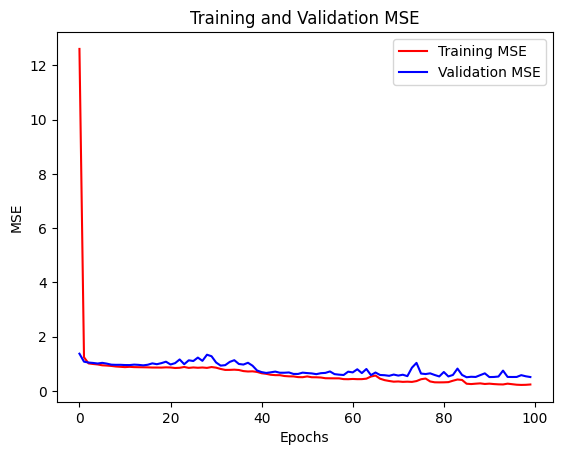

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test sets for each training epoch
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mse))  # Get the number of epochs
# Plot training and validation MSE
plt.plot(epochs, mse, 'r')
plt.plot(epochs, val_mse, 'b')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Training MSE', 'Validation MSE'])
plt.figure()


In [18]:
def predict_pKd(drug, protein):
    drug_sequence = tokenizer_smiles.texts_to_sequences([drug])
    drug_padded = pad_sequences(drug_sequence, truncating="post", padding="post", maxlen=85)
    
    protein_sequence = tokenizer_proteins.texts_to_sequences([protein])
    protein_padded = pad_sequences(protein_sequence, truncating="post", padding="post", maxlen=1200)
    
    prediction = model.predict([tf.expand_dims(drug_padded, axis=-1), tf.expand_dims(protein_padded, axis=-1)])
    return prediction.item()




In [29]:
drug = test_smiles[1000]
protein = test_proteins[1000]
label = test_labels[1000]

print(label)
predict_pKd(drug=drug, protein=protein)

IndexError: list index out of range